### Linear Regression Tutorial
Author: Dr. Sampath Lonka

Date: July 21, 2022

Data set: tips.csv

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#load the data
data = pd.read_csv("E:/MDSC-ML/MDSC-ML-Lab/Datasets/tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Full description of dataset

- `total_bill`: Total bill in dollars including tax
- `tip`: Tip given to waiter in dollars
- `sex`: gender of the person paying the bill
- `smoker`: whether the person smoked or not
- `day`: day of the week
- `time`: lunch or dinner
- `size`: number of people

### Waiter Tips Analysis

We consider the following features:

1. the total bill paid
2. number of people at a table
3. the day of the week 

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns   

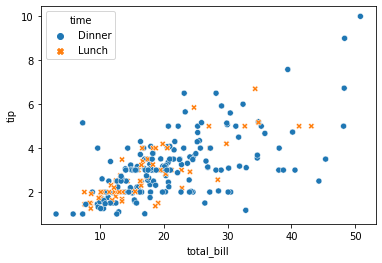

In [4]:
sns.scatterplot(data=data, x="total_bill",y="tip", hue="time",style="time")
plt.show()

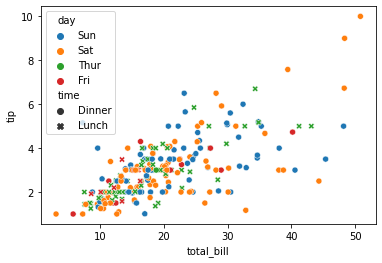

In [8]:
sns.scatterplot(data=data, x="total_bill",y="tip", hue="day",style="time")
plt.show()

In [5]:
data["tip_rate"] = data["tip"]/data["total_bill"]
data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


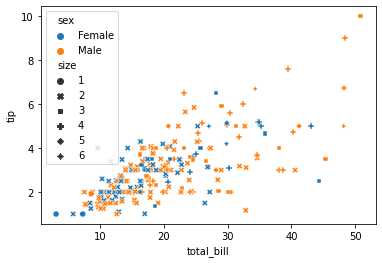

In [6]:
sns.scatterplot(data=data, x="total_bill",
                    y="tip", style="size", hue= "sex")
plt.show()

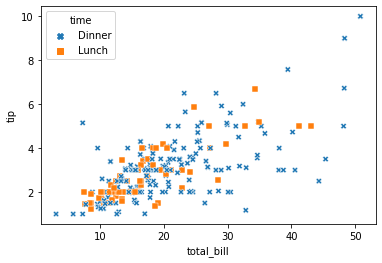

In [15]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(data=data, x="total_bill", y="tip", style="time",hue="time", markers=markers)
plt.show()

### Some useful pie charts using `plotly`

In [7]:
import plotly.express as px

In [8]:
figure = px.pie(data,
                values='tip',
                names = 'smoker',
                hole =0.5)
figure.show()

In [9]:
figure = px.pie(data,
                values='tip',
                names = 'sex',
                hole =0.5)
figure.show()

In [10]:
figure = px.pie(data,
                values='tip',
                names = 'day',
                hole =0.5)
figure.show()

In [11]:
data["sex"] = data["sex"].map({"Female":0,"Male":1}) 
data['smoker'] = data["smoker"].map({"No":0,"Yes":1})
data["day"] = data["day"].map({"Thur":0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch":0, "Dinner":1})
data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,0,3,1,2,0.059447
1,10.34,1.66,1,0,3,1,3,0.160542
2,21.01,3.50,1,0,3,1,3,0.166587
3,23.68,3.31,1,0,3,1,2,0.139780
4,24.59,3.61,0,0,3,1,4,0.146808


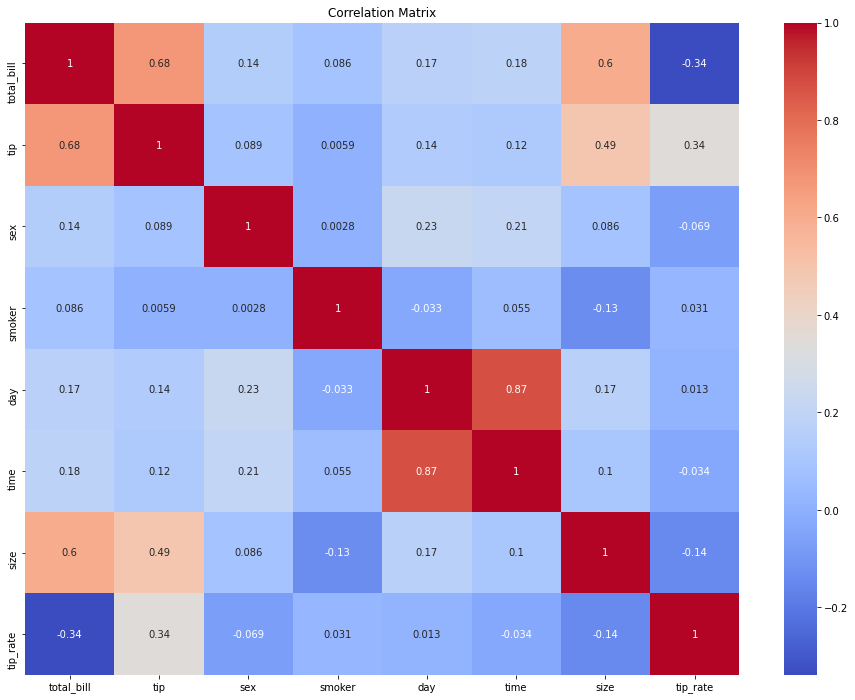

In [12]:
# correlation matrix
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
def mle_estimater(X,y):
    """
    X is nxk matrix
    y is nx1 matrix
    """
    n, k = X.shape
    X_aug = np.hstack([np.ones((n,1)),X])
    theta_ml = np.linalg.solve(X_aug.T@X_aug, X_aug.T@y)
    return theta_ml

def predict_mle(Xtest,theta):
    n, k = Xtest.shape
    Xtest_aug = np.hstack([np.ones((n,1)),Xtest]) 
    y_hat = Xtest_aug@theta 
    return y_hat

In [24]:
# compute mle_estimator
X = np.array([-3, -2, 0, 1, 2]).reshape(-1,1)
y = np.array([1.6, 0.5, 1, 3, 5]).reshape(-1,1)

In [28]:
theta= mle_estimater(X,y)
print(theta)

[[2.49069767]
 [0.67674419]]


In [33]:
Xtest = np.array([-3, 1,4]).reshape(-1,1)
predict_mle(Xtest,theta)

array([[0.46046512],
       [3.16744186],
       [5.19767442]])

### Modeling 

In [21]:
X = np.array(data[["total_bill","sex","smoker", "day", 
                   "time", "size"]])
y = np.array(data["tip"])
print(X.shape)
print(y.shape)

(244, 6)
(244,)


In [15]:
Xtrain = X[0:220]
ytrain = y[0:220]  
Xtest = X[220:]  
ytest = y[220:]

In [16]:
Xtrain.shape

(220, 6)

In [17]:
theta = mle_estimater(Xtrain,ytrain)
print(theta)

[ 0.67602081  0.09699998 -0.00996584  0.00104813  0.02782831 -0.01864819
  0.15567707]


In [62]:
X[0:1].shape

(1, 6)

In [18]:
y_pred = predict_mle(Xtest,theta)
print(y_pred)

[2.18580529 2.3179911  1.6828683  2.72093999 2.30802527 2.59444105
 1.99498117 3.30942124 2.30257726 3.17107104 3.6557893  2.6930724
 2.14058729 2.05910731 2.52187534 1.99120733 2.2376654  4.19997498
 4.65556969 3.986004   3.66189093 3.21445519 2.74295716 2.79038636]


In [19]:
pd.DataFrame({"y":ytest, "y_pred":y_pred})

,y,y_pred
0,2.20,2.185805
1,3.48,2.317991
2,1.92,1.682868
3,3.00,2.720940
4,1.58,2.308025
5,2.50,2.594441
6,2.00,1.994981
7,3.00,3.309421
8,2.72,2.302577
9,2.88,3.171071


### modeling using `sklearn`

In [23]:
#split the data into train and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#load the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression()

In [27]:
model.predict(Xtest[0:1])

array([2.95915033])

In [31]:
#print the parameters
print(f"The coefficients are: {model.coef_}") 
print(f"The intercept of the model is: {model.intercept_}")  

The coefficients are: [ 0.0944405   0.02456897 -0.18117471  0.06380238 -0.19306402  0.23194949]
The intercept of the model is: 0.6643309656240288


In [46]:
#R^2 coefficient
model.score(X,y)

0.46383156086801336

### Health Insurance Prediction

Dataset: [Health Insurance Dataset](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset?resource=download)

Question:

1. Explore the dataset 
2. Perform EDA (must include scatter plots, pie charts, Histograms, Boxplots, correlation plots) and make the inferences
3. Develop a linear model for the response variable `charges` using all availble other features
4. Evaluate the model 